**Introduction**
This Jupyter Notebook is dedicated to the exploration, preprocessing, and modeling of the Breast Cancer dataset, commonly used in machine learning for predictive analysis. The dataset is sourced from the scikit-learn library, which provides high-quality datasets for educational and benchmarking purposes.

**Dataset Overview**
The Breast Cancer dataset is a classic and simple binary classification dataset. It comprises features computed from a digitised image of a fine needle aspirate (FNA) of a breast mass. The goal is to predict whether the cancer is benign or malignant based on these features.

**Variables Description**
The dataset contains several features grouped into three major categories: mean, standard error, and "worst" (mean of the three largest values). Below is a brief overview of each variable:

**Mean Features**

**mean radius**: the average of distances from the center to points on the perimeter.

**mean texture**: standard deviation of gray-scale values in the image.

**mean perimeter** and mean area: the average size of the core tumor.

**mean smoothness**: mean of local variation in radius lengths.

**mean compactness**: mean of perimeter^2 / area - 1.0.

**mean concavity**: mean of severity of concave portions of the contour.

**mean concave points**: mean for number of concave portions of the contour.

**mean symmetry and mean fractal dimension**: average symmetry and fractal dimension.

**Standard Error Features**

Similar to mean features but representing the standard error for each.

**Worst Features**

These are the mean of the three largest values for each feature, representing the worst or largest values found in the tumor.

**Project Objective**
The main objective of this project is to apply various machine learning techniques to this dataset to accurately classify tumors into benign or malignant. I will explore different data visulisation, preprocessing techniques, classification algorithms and feature selection methods to build a model with high predictive accuracy and extract insights on the predictors of malignant vs benign tumours.

**Import the necessary libraries**

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


**Inspect the data**

In [47]:
# Load the dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Display the first few rows of the dataset
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


**Load Descriptives**

In [48]:
# Dataset statistics
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [49]:
# Check for missing values
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

Because there are many variables, I'll display boxplots instead of histograms for ease of interpretation

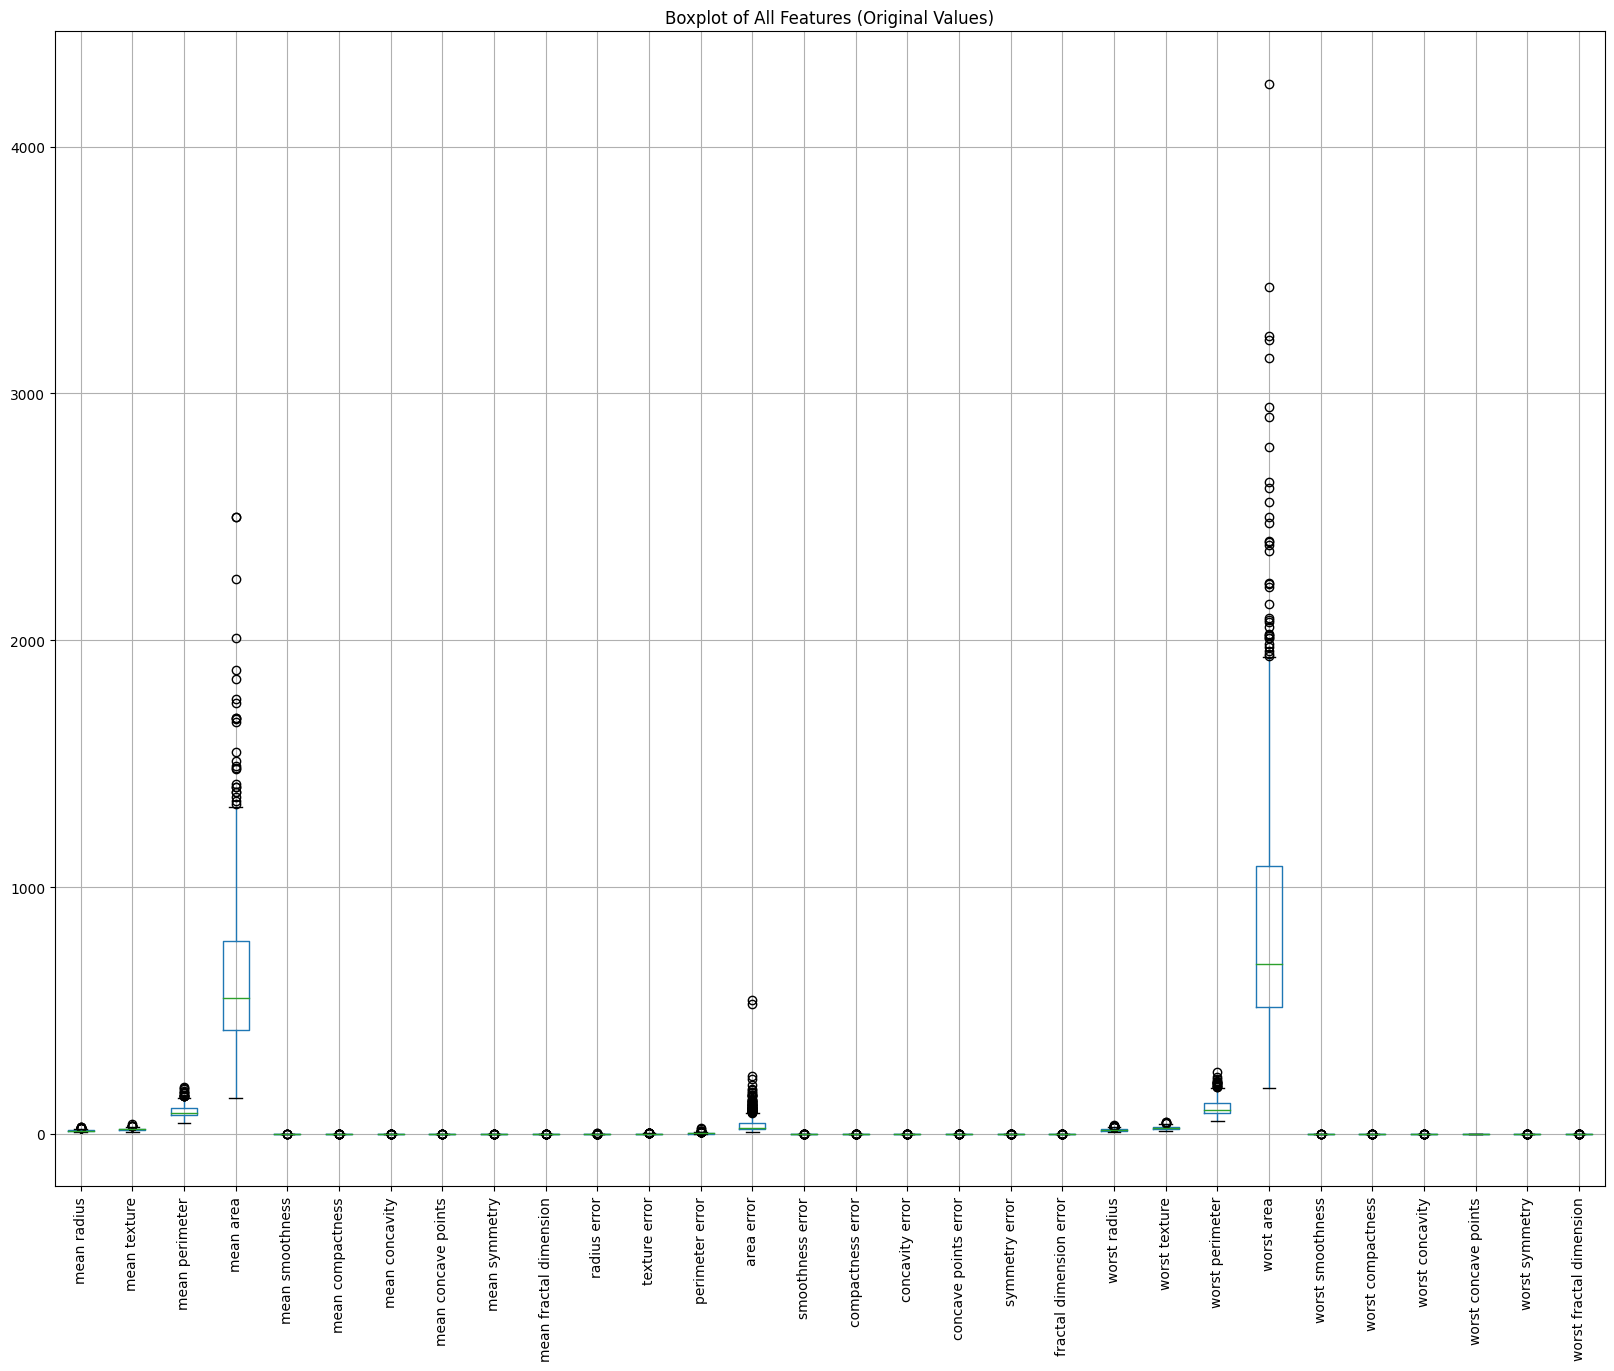

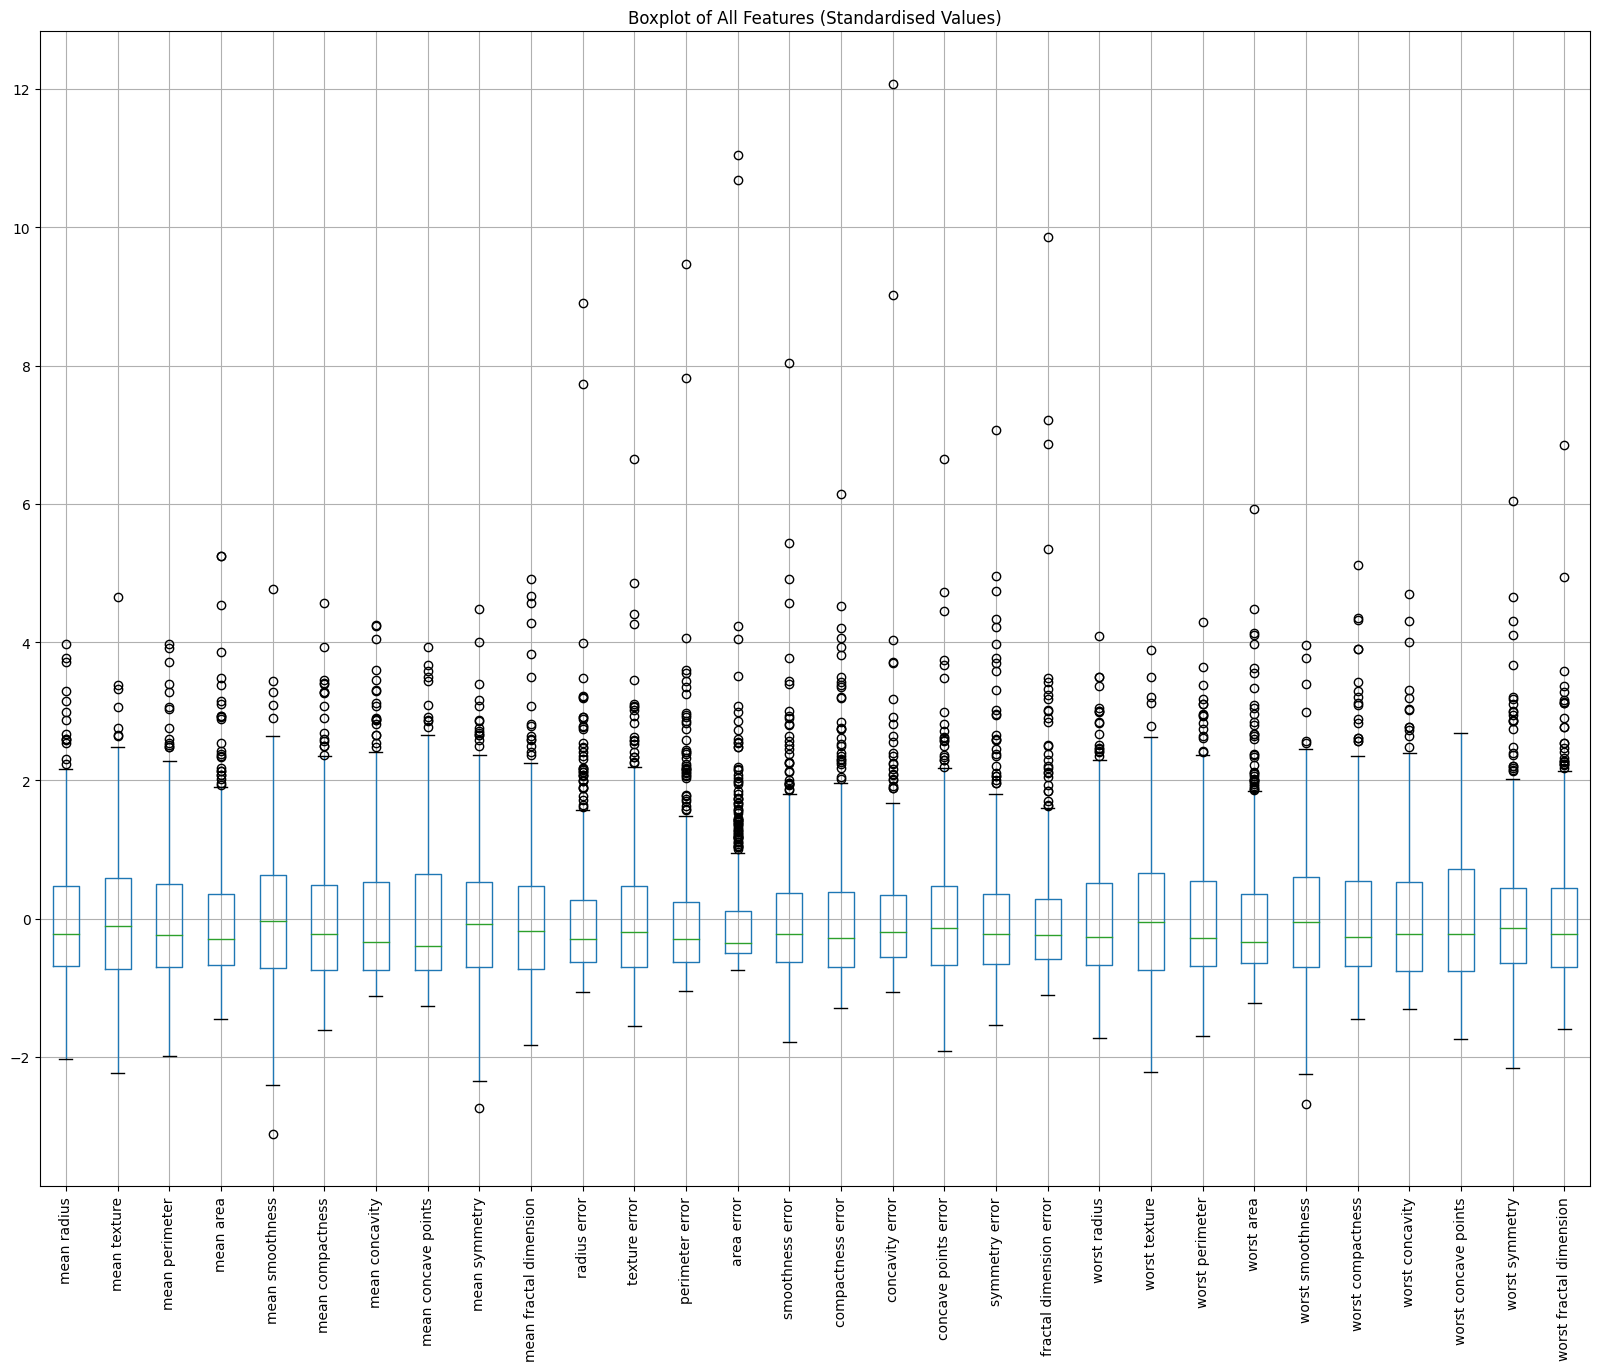

In [50]:
# Create the boxplot for original values
plt.figure(figsize=(20, 15))
df.iloc[:, :-1].boxplot(rot=90)
plt.title('Boxplot of All Features (Original Values)')
plt.show()

# Standardise the features
scaler = StandardScaler()
df_standardised = pd.DataFrame(scaler.fit_transform(df.iloc[:, :-1]), columns=df.columns[:-1])

# Create the boxplot for standardised values
plt.figure(figsize=(20, 15))
df_standardised.boxplot(rot=90)
plt.title('Boxplot of All Features (Standardised Values)')
plt.show()

After standardisation, there are still significant outliers. This is unlikely to be an issue for the following reasons:

- Standardisation normalises the range of values
- Random forest is resistant to outliers
- Hyperparameter tuning and regularisation will mitigate any bias introduced by outliers

I'm going to generate a correlation heatmap to get a sense for the relationships between variables and check for multicollinearity

<Axes: >

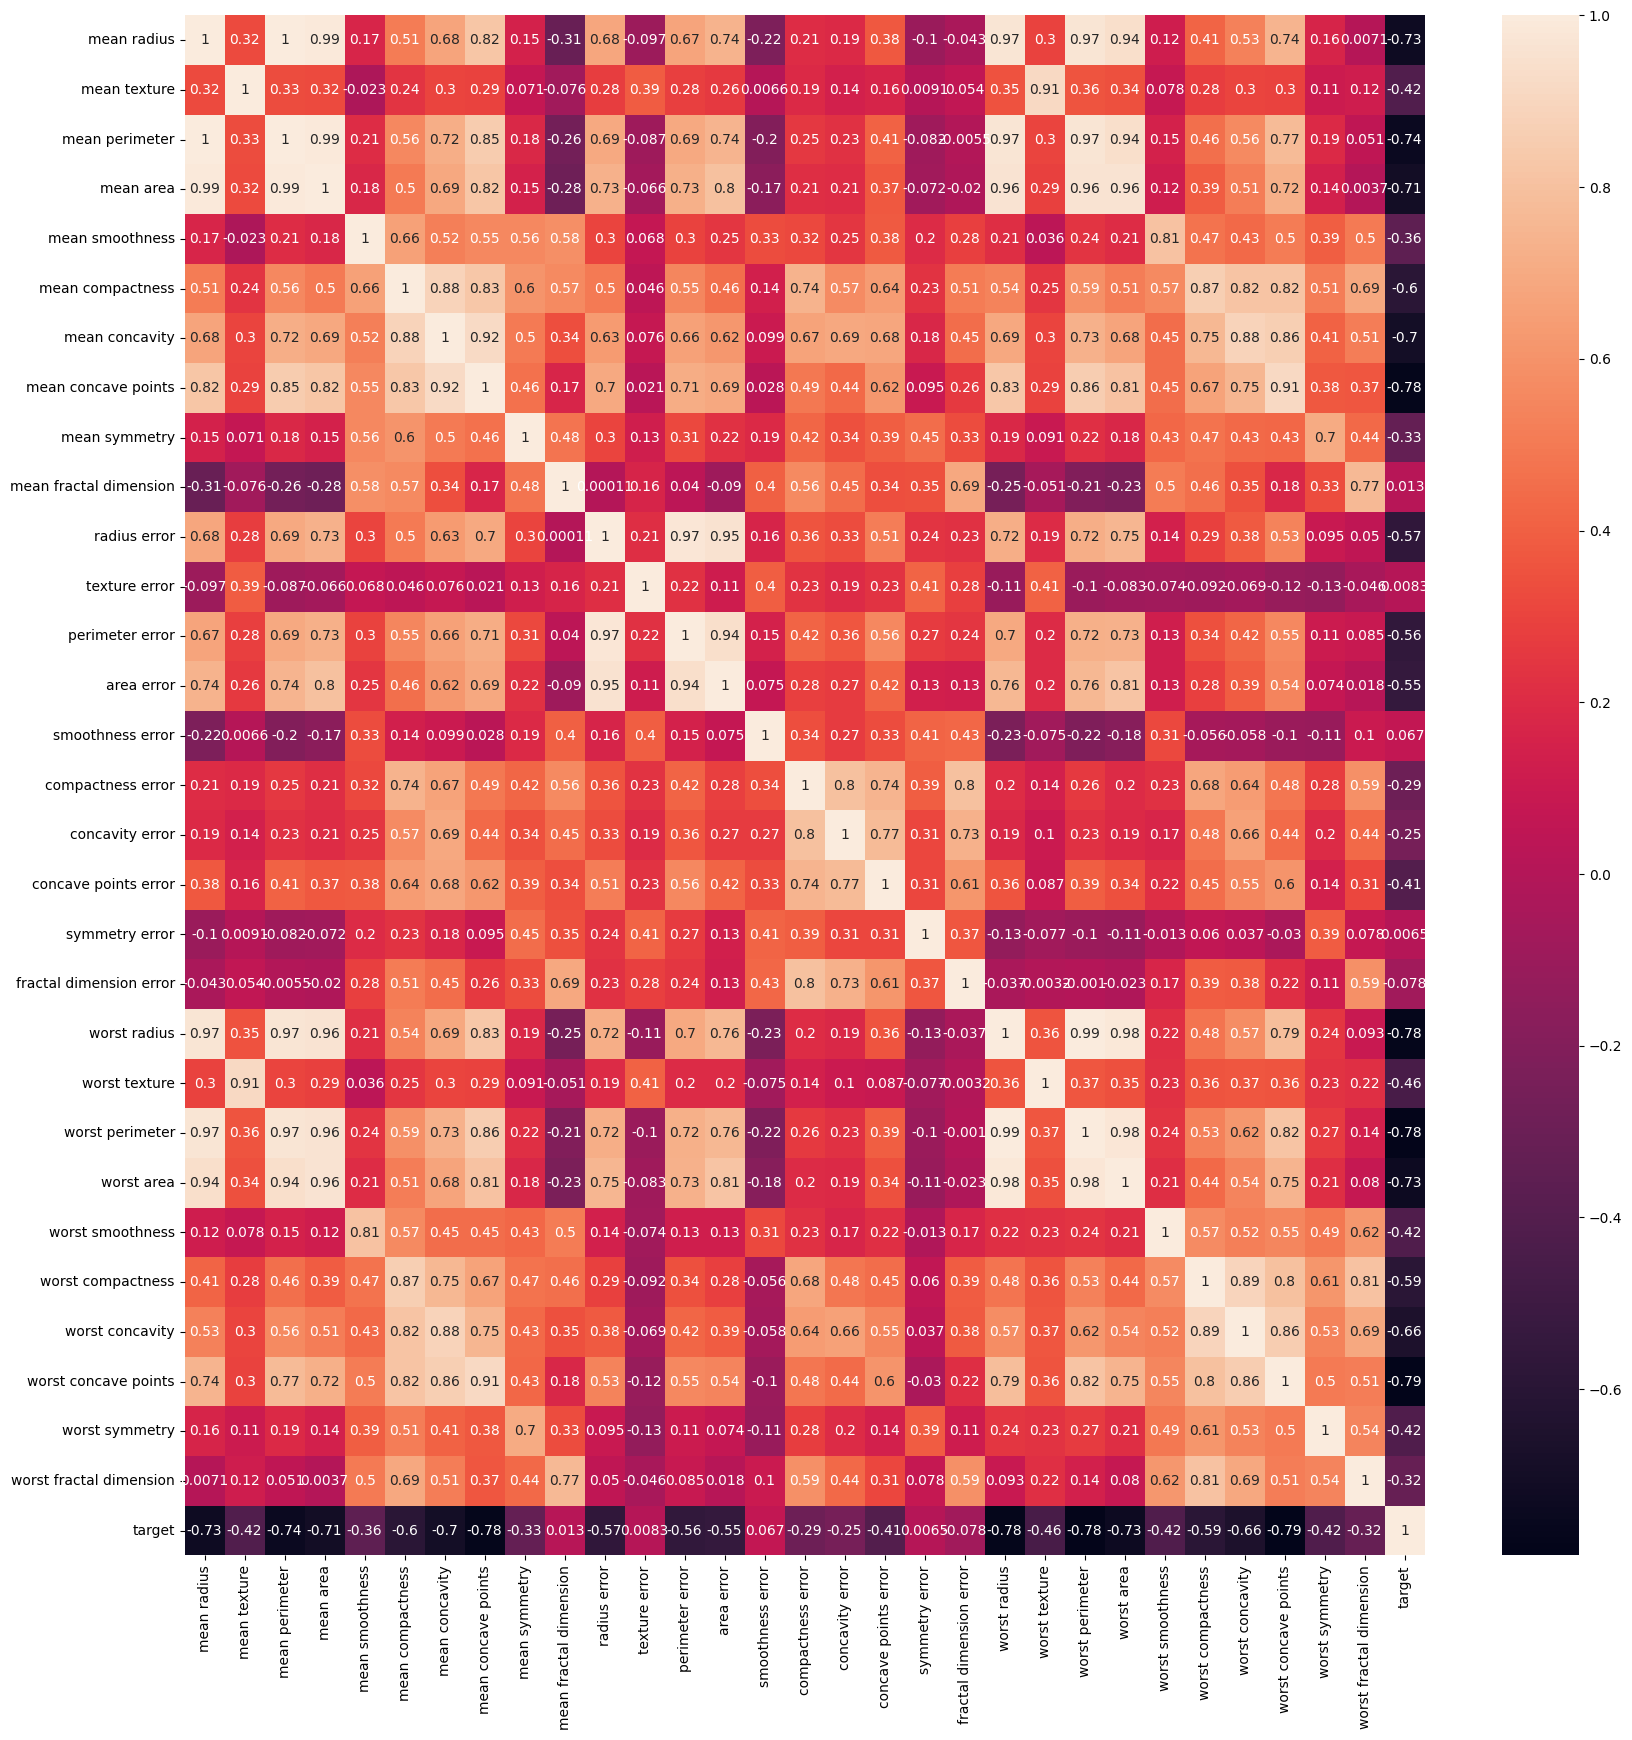

In [51]:
# Heatmap for correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True)


There are notably high intercorrelations, some as high as .90. I will confirm if there is multicollinearity by using variance inflation factor

In [52]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming `df` is your dataframe and it is already loaded and preprocessed

# Dropping the target variable if present
# Assuming the target variable is named 'target', adjust this as necessary
X = df.drop(columns=['target'])

# Adding a constant to the dataframe for VIF calculation
X = sm.add_constant(X)

# Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Output the VIF values
print(vif_data)


                    Feature          VIF
0                     const  1868.188844
1               mean radius  3806.115296
2              mean texture    11.884048
3            mean perimeter  3786.400419
4                 mean area   347.878657
5           mean smoothness     8.194282
6          mean compactness    50.505168
7            mean concavity    70.767720
8       mean concave points    60.041733
9             mean symmetry     4.220656
10   mean fractal dimension    15.756977
11             radius error    75.462027
12            texture error     4.205423
13          perimeter error    70.359695
14               area error    41.163091
15         smoothness error     4.027923
16        compactness error    15.366324
17          concavity error    15.694833
18     concave points error    11.520796
19           symmetry error     5.175426
20  fractal dimension error     9.717987
21             worst radius   799.105946
22            worst texture    18.569966
23          wors

Based on the correlation matrix and VIF values, there is a significant amount of multicollinearity in the sample. This is problematic as it can bias parameter estimates and make coefficients unstable. Put simply, any insights extracted from modelling this dataset can be thrown way off if not handled properly.

To remedy this, I will use models that are resistant to overfitting and regularisation as a feature selection method for choosing the most important variables.

I'm now going to model the data. For classification tasks like this, I tend to use logisitc regression and randomforest classifiers as they are particularily resistant to overfitting

*Since I'll be using a confusion matrix many times throughout this analysis, I've written a function to save time*

In [53]:
# Confusion Matrix function

def Confusion(matrix, title):
  # Confusion Matrix
  cm = matrix

  # Define labels
  labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

  # Plot confusion matrix
  plt.figure(figsize=(6, 4))
  sns.heatmap(cm, annot=True, cmap='Greens', fmt='g', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'], cbar=True)
  plt.title(title)
  plt.gca().xaxis.tick_top()  # Move x-axis labels to top
  plt.gca().xaxis.set_label_position('top')
  plt.ylabel('True labels')
  plt.show()

In [54]:
# Splitting the data
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Logistic Regression Model**

In [55]:
logistic = LogisticRegression()
logistic.fit(X_train_scaled, y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Train Score: 0.99
Test Score: 0.97


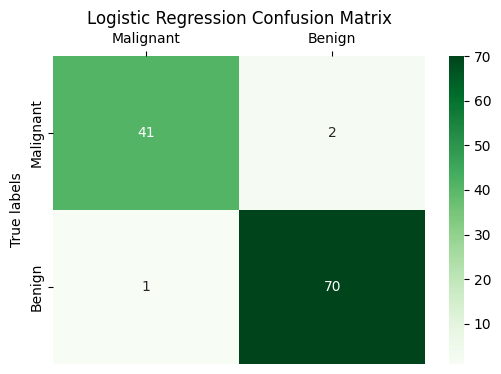

In [56]:
# Predictions
y_pred = logistic.predict(X_test_scaled)

# Evaluation metrics
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Calculating scores and MSE
train_score = logistic.score(X_train_scaled, y_train)
test_score = logistic.score(X_test_scaled, y_test)
y_pred = logistic.predict(X_test_scaled)

# Rounding
train_score_rounded = round(train_score, 2)
test_score_rounded = round(test_score, 2)

# Printing the results
print("Train Score:", train_score_rounded)
print("Test Score:", test_score_rounded)

Confusion(matrix = cm, title = 'Logistic Regression Confusion Matrix')

**RandomForest**

In [57]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      0.09      0.17        43
           1       0.65      1.00      0.78        71

    accuracy                           0.66       114
   macro avg       0.82      0.55      0.48       114
weighted avg       0.78      0.66      0.55       114

Train Score: 0.99
Test Score: 0.97


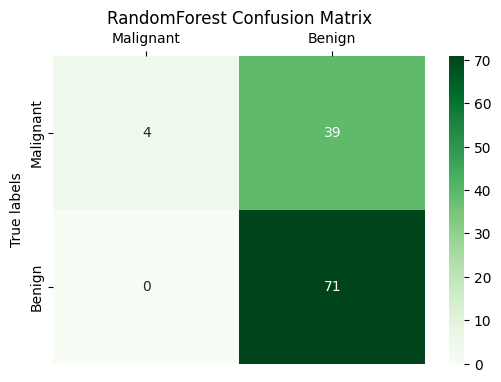

In [58]:
# Predictions
y_pred = rf_classifier.predict(X_test_scaled)

# Evaluation metrics
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Calculating scores and MSE
train_score = logistic.score(X_train_scaled, y_train)
test_score = logistic.score(X_test_scaled, y_test)
y_pred = logistic.predict(X_test_scaled)

# Rounding
train_score_rounded = round(train_score, 2)
test_score_rounded = round(test_score, 2)

# Printing the results
print("Train Score:", train_score_rounded)
print("Test Score:", test_score_rounded)

Confusion(cm, title = 'RandomForest Confusion Matrix')


The logistic regression model is performing fairly well with a 95 - 96% accuracy and I suspect this is due to multicollinearity being unaddressed. The Random Forest model is performing more realistically at  66% accuracy, but is too biased towards false positives. There's certainly room for improvement.

I'm now going to do some hyperparameter tuning and cross-validation to improve the models and hopefully shift it in a way that is slightly towards false positives (safer bet for real world outcomes in breast cancer: false positive results in a simple mammogram test, the alternative is more dire)

**Hyperparameter Tuning**

Logistic

Logistic Regression Validation Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        42
           1       0.99      1.00      0.99        72

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



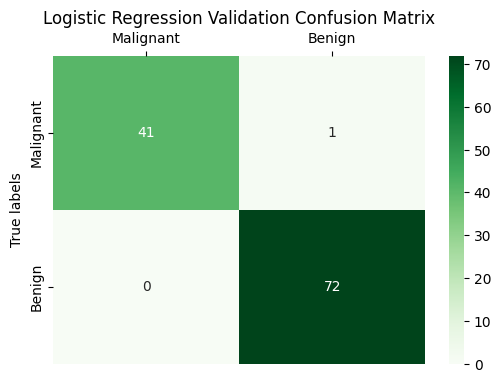

Logistic Regression Test Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        38
           1       1.00      0.99      0.99        76

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



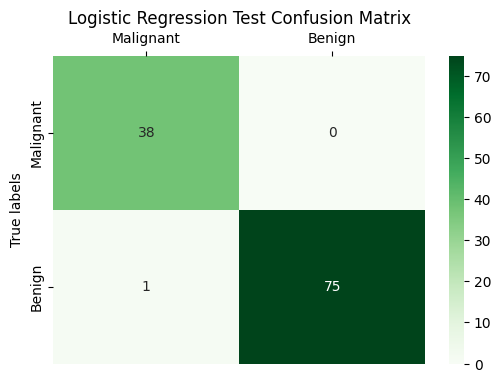

Train Score: 0.98
Validation Score: 0.99
Test Score: 0.99


In [64]:
# Split the dataset into training, validation, and test sets (60% train, 20% validation, 20% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Define parameter grid for logistic regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100], # Regularization strength
    'penalty': ['l1', 'l2'],       # Penalty type
    'solver': ['liblinear', 'saga'] # Solver to use
}

# Train the logistic regression model using GridSearchCV for hyperparameter tuning
logistic_model = LogisticRegression(max_iter=10000, random_state=42)
grid_search_logistic = GridSearchCV(logistic_model, param_grid, cv=5)
grid_search_logistic.fit(X_train_scaled, y_train)
best_logistic_model = grid_search_logistic.best_estimator_

# Validate the logistic regression model
y_val_pred_logistic = best_logistic_model.predict(X_val_scaled)
logistic_val_report = classification_report(y_val, y_val_pred_logistic)
logistic_val_conf_matrix = confusion_matrix(y_val, y_val_pred_logistic)

# Evaluate the logistic regression model on the test set
y_test_pred_logistic = best_logistic_model.predict(X_test_scaled)
logistic_test_report = classification_report(y_test, y_test_pred_logistic)
logistic_test_conf_matrix = confusion_matrix(y_test, y_test_pred_logistic)

# Print logistic regression results
print("Logistic Regression Validation Report")
print(logistic_val_report)
Confusion(matrix=logistic_val_conf_matrix, title="Logistic Regression Validation Confusion Matrix")

print("Logistic Regression Test Report")
print(logistic_test_report)
Confusion(matrix=logistic_test_conf_matrix, title="Logistic Regression Test Confusion Matrix")

# Calculating scores
train_score = best_logistic_model.score(X_train_scaled, y_train)
val_score = best_logistic_model.score(X_val_scaled, y_val)
test_score = best_logistic_model.score(X_test_scaled, y_test)

# Rounding
train_score_rounded = round(train_score, 2)
val_score_rounded = round(val_score, 2)
test_score_rounded = round(test_score, 2)

# Print the train score, validation score, and test score
print("Train Score:", train_score_rounded)
print("Validation Score:", val_score_rounded)
print("Test Score:", test_score_rounded)

Random Forest

Random Forest Validation Report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Random Forest Validation Report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



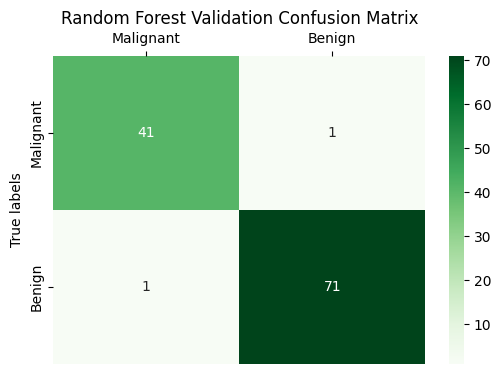

Random Forest Test Report
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        38
           1       0.96      1.00      0.98        76

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



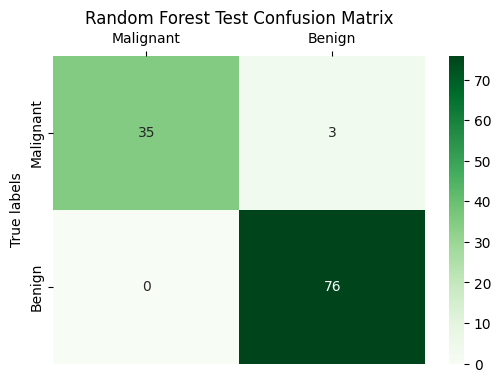

Train Score: 1.0
Validation Score: 0.98
Test Score: 0.97


In [60]:
# Train the random forest model using GridSearchCV for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
}
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
best_rf_model = grid_search.best_estimator_

# Validate the random forest model
y_val_pred_rf = best_rf_model.predict(X_val_scaled)
rf_val_report = classification_report(y_val, y_val_pred_rf)
rf_val_conf_matrix = confusion_matrix(y_val, y_val_pred_rf)

# Evaluate the random forest model on the test set
y_test_pred_rf = best_rf_model.predict(X_test_scaled)
rf_test_report = classification_report(y_test, y_test_pred_rf)
rf_test_conf_matrix = confusion_matrix(y_test, y_test_pred_rf)

# Print random forest results
print("Random Forest Validation Report")
print(rf_val_report)

# Print random forest results
print("Random Forest Validation Report")
print(rf_val_report)

Confusion(matrix=rf_val_conf_matrix, title="Random Forest Validation Confusion Matrix")

print("Random Forest Test Report")
print(rf_test_report)

Confusion(matrix=rf_test_conf_matrix, title="Random Forest Test Confusion Matrix")

# Calculating scores and MSE
train_score = best_rf_model.score(X_train_scaled, y_train)
val_score = best_rf_model.score(X_val_scaled, y_val)
test_score = best_rf_model.score(X_test_scaled, y_test)

# Rounding
train_score_rounded = round(train_score, 2)
val_score_rounded = round(val_score, 2)
test_score_rounded = round(test_score, 2)

# Print the train score, validation score, test score, and mean squared error
print("Train Score:", train_score_rounded)
print("Validation Score:", val_score_rounded)
print("Test Score:", test_score_rounded)


Model accuracy has greatly improved. Now that we've used train, test, and validation, I'll run VIF to check for multicollinearity again

In [65]:
# Calculate VIF for multicollinearity assessment
X_train_df = pd.DataFrame(X_train_scaled, columns=data.feature_names)
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_df.values, i) for i in range(X_train_df.shape[1])]

print(vif_data)

                    feature          VIF
0               mean radius  4366.979324
1              mean texture    13.652682
2            mean perimeter  4494.413579
3                 mean area   397.527368
4           mean smoothness     8.377909
5          mean compactness    51.754550
6            mean concavity    81.437725
7       mean concave points    66.689932
8             mean symmetry     3.987615
9    mean fractal dimension    17.480032
10             radius error    80.065105
11            texture error     5.308134
12          perimeter error    83.786352
13               area error    44.988770
14         smoothness error     4.283121
15        compactness error    15.042335
16          concavity error    18.233140
17     concave points error    12.889004
18           symmetry error     4.928682
19  fractal dimension error    11.756562
20             worst radius   719.403024
21            worst texture    22.791344
22          worst perimeter   473.745407
23              

We're still well over the acceptable range for VIF (> 5 is generally problematic) and so I'll be using a regularisation technique to both patch the multicollinearity and do some feature selection. This will consolidate the most important variables and reduce overall bias in our parameter estimates.

**Regularisation**

Logistic

Ridge Regularised Logistic Regression Validation Report
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        42
           1       0.96      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



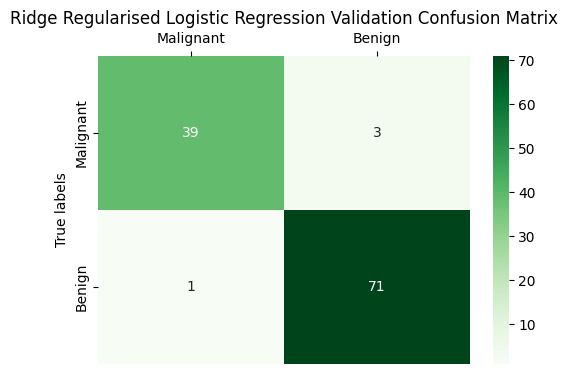

Ridge Regularised Logistic Regression Test Report
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        38
           1       0.99      0.99      0.99        76

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



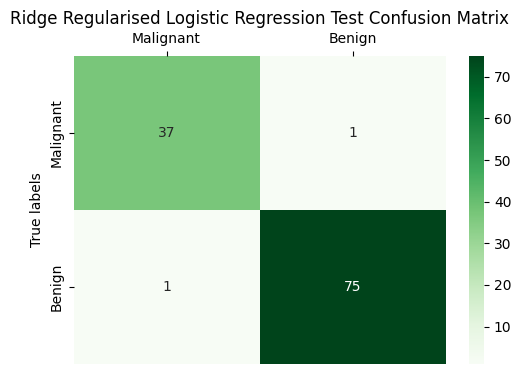

Intercept: 0.22580645161290386


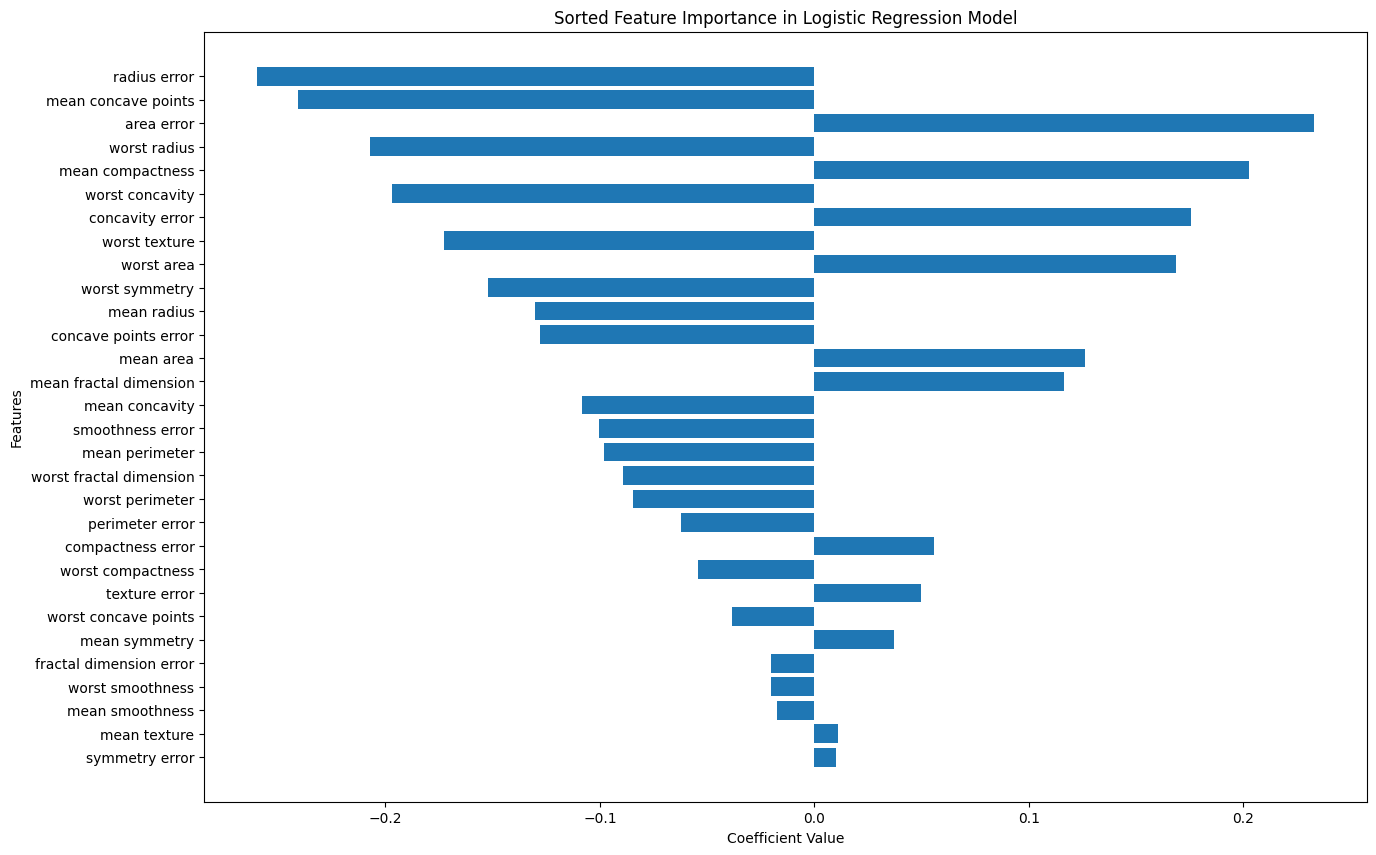

In [62]:
from sklearn.linear_model import RidgeClassifier

# Hyperparameter tuning for Ridge regularisation in logistic regression
param_grid_ridge = {'alpha': [0.1, 1, 10, 100]}
ridge_model = RidgeClassifier()
grid_search_ridge = GridSearchCV(ridge_model, param_grid_ridge, cv=5)
grid_search_ridge.fit(X_train_scaled, y_train)
best_ridge_model = grid_search_ridge.best_estimator_

# Validate the Ridge regularised logistic regression model
y_val_pred_ridge = best_ridge_model.predict(X_val_scaled)
ridge_val_report = classification_report(y_val, y_val_pred_ridge)
ridge_val_conf_matrix = confusion_matrix(y_val, y_val_pred_ridge)

# Evaluate the Ridge regularised logistic regression model on the test set
y_test_pred_ridge = best_ridge_model.predict(X_test_scaled)
ridge_test_report = classification_report(y_test, y_test_pred_ridge)
ridge_test_conf_matrix = confusion_matrix(y_test, y_test_pred_ridge)

# Print Ridge regularised logistic regression model results
print("Ridge Regularised Logistic Regression Validation Report")
print(ridge_val_report)

Confusion(matrix = ridge_val_conf_matrix, title = "Ridge Regularised Logistic Regression Validation Confusion Matrix")

print("Ridge Regularised Logistic Regression Test Report")
print(ridge_test_report)

Confusion(matrix = ridge_test_conf_matrix, title = "Ridge Regularised Logistic Regression Test Confusion Matrix")

# Feature selection based on coefficients from Ridge regularised logistic regression
feature_names = X.columns
coefficients = best_ridge_model.coef_[0]

# Combine feature names and coefficients into a dictionary and sort by the absolute value of coefficients
feature_importances_ridge = dict(zip(feature_names, coefficients))
sorted_features_ridge = sorted(feature_importances_ridge.items(), key=lambda x: abs(x[1]), reverse=True)

# Unpack the sorted items for printing and plotting
sorted_features_names_ridge, sorted_coefficients_ridge = zip(*sorted_features_ridge)

# Print the intercept
print(f"Intercept: {best_ridge_model.intercept_[0]}")

# Create a horizontal bar graph for Ridge regularised logistic regression coefficients
plt.figure(figsize=(15, 10))
plt.barh(sorted_features_names_ridge, sorted_coefficients_ridge)
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Sorted Feature Importance in Logistic Regression Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()


Random Forest

Random Forest Validation Report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



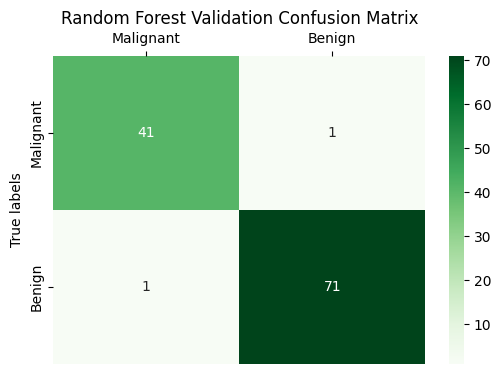

Random Forest Test Report
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        38
           1       0.96      1.00      0.98        76

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



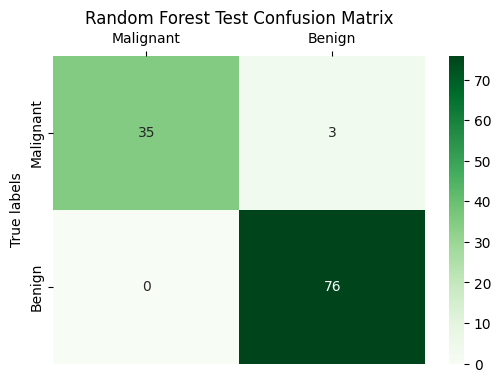

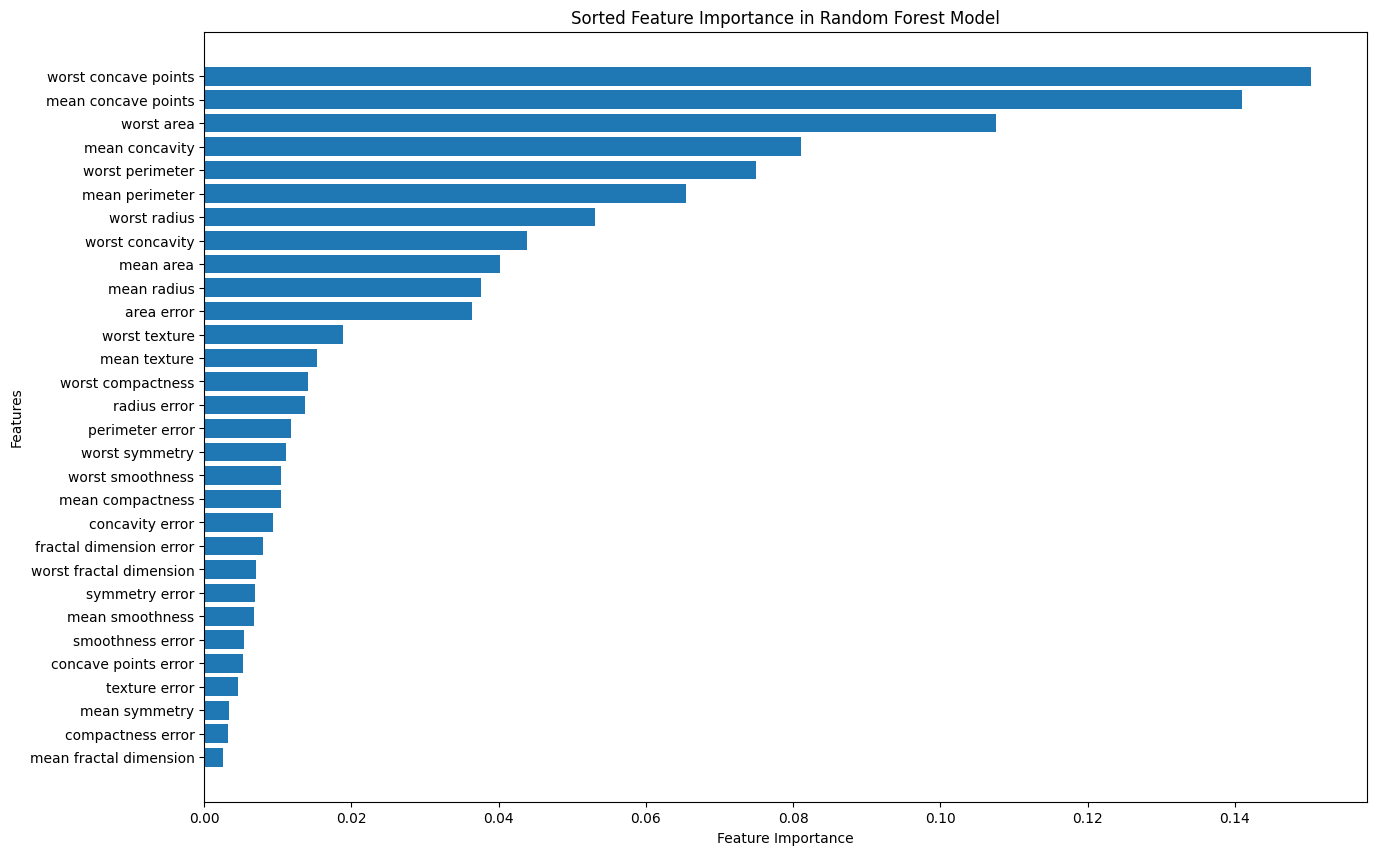

In [63]:
# Hyperparameter tuning for Random Forest model
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
}
rf_model = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5)
grid_search_rf.fit(X_train_scaled, y_train)
best_rf_model = grid_search_rf.best_estimator_

# Validate the Random Forest model
y_val_pred_rf = best_rf_model.predict(X_val_scaled)
rf_val_report = classification_report(y_val, y_val_pred_rf)
rf_val_conf_matrix = confusion_matrix(y_val, y_val_pred_rf)

# Evaluate the Random Forest model on the test set
y_test_pred_rf = best_rf_model.predict(X_test_scaled)
rf_test_report = classification_report(y_test, y_test_pred_rf)
rf_test_conf_matrix = confusion_matrix(y_test, y_test_pred_rf)

# Print Random Forest model results
print("Random Forest Validation Report")
print(rf_val_report)

Confusion(matrix = rf_val_conf_matrix, title = "Random Forest Validation Confusion Matrix")

print("Random Forest Test Report")
print(rf_test_report)

Confusion(matrix = rf_test_conf_matrix, title = "Random Forest Test Confusion Matrix")

# Feature importance from Random Forest model
feature_importances_rf = best_rf_model.feature_importances_
sorted_idx_rf = np.argsort(feature_importances_rf)[::-1]
sorted_features_rf = X.columns[sorted_idx_rf]
sorted_importances_rf = feature_importances_rf[sorted_idx_rf]

# Create a horizontal bar graph for Random Forest feature importances
plt.figure(figsize=(15, 10))
plt.barh(sorted_features_rf, sorted_importances_rf)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Sorted Feature Importance in Random Forest Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()

**This notebook presented a complete workflow for a machine learning project using the Breast Cancer dataset, including EDA, preprocessing, model training, and evaluation.**

Summary:

- Imported the dataset
- Produced and visualised basic descriptive statistics with mean, standard deviation and correlation matrix
- Checked for multicollinearity with r correlations and VIF values
- Modelled the data using logistic regression and randomforest classifier to prevent overfitting and determine the best predictors of benign vs malignant tumours
- Refined the models by using train, test, and validation sets, as well as hyperparameter tuning and regularisation techniques to remedy multicollinearity and utilise feature selection
- Visualised the refined model coefficients to demonstrate the most significant predictors of benign vs malignant tumours across models.

I have modelled the breast cancer dataset with a 97-98% accuracy. Though the logistic regression model is slightly superior in terms of model accuracy, the random forest is biased towards false positives which is safer for real world outcomes. Additionally, visualising the coefficients provides insight into the best predictors of benign versus malignant tumours.
